# Test fitting using zfit

In [35]:
import numpy as np
import zfit
import matplotlib.pyplot as plt
import tensorflow as tf
import zfit.z.numpy as znp

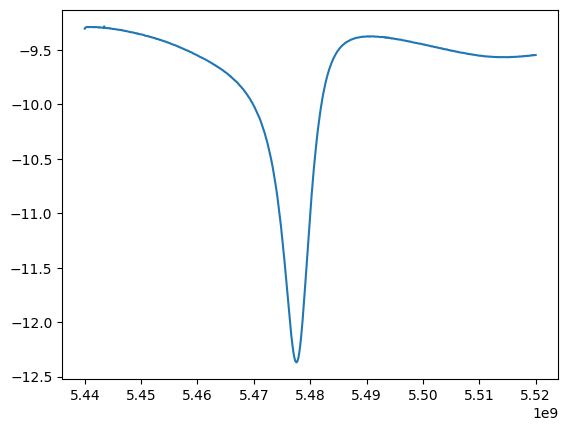

In [16]:
# Read data 
path = '../Data/fit_test/Resonances/20mK_-5dBm.txt'
raw_data = np.loadtxt(path, delimiter=' ', skiprows=0)

plt.plot(raw_data[:,0], raw_data[:,1])

In [36]:
def S21_func(f, a, b, f_r, Q_l, Q_c, phi_0):
    omega = 2 * znp.pi * f
    omega_r = 2*znp.pi * f_r
    term1 = a*f + b*(f**2) 
    term2 = Q_l/znp.abs(Q_c) * znp.exp(1j * phi_0)
    term3 = 1 + 2j * Q_l * (f/f_r - 1)
    S21 = term1 * (term2/term3)
    return S21

In [37]:
# Fit with zfit
X = raw_data[:,0]
Y = raw_data[:,1]
obs = zfit.Space('x', limits=(np.min(X), np.max(X)))

# Data
data = zfit.Data.from_numpy(obs=obs, array=X)

# Parameters
a = zfit.Parameter('a', 0.01)
b = zfit.Parameter('b', 0.01)
f_r = zfit.Parameter('f_r', 0.01)
Q_l = zfit.Parameter('Q_l', 1000)
Q_c = zfit.Parameter('Q_c', 1000)
phi_0 = zfit.Parameter('phi_0', 0.01)

# Model
model = S21_func(data, a, b, f_r, Q_l, Q_c, phi_0)

# Loss
def mse(params):
    a, b, f_r, Q_l, Q_c, phi_0 = params
    prediction = model(data, a, b, f_r, Q_l, Q_c, phi_0)
    value = tf.reduce_mean((prediction - Y) ** 2)
    return value

loss = zfit.loss.SimpleLoss(mse, [a, b, f_r, Q_l, Q_c, phi_0])

# Minimizer
minimizer = zfit.minimize.Minuit()

TypeError: unsupported operand type(s) for *: 'float' and 'Data'

In [13]:
data

<zfit.Data: Data obs=('x',) shape=(10000, 1)>